# **Imports**

In [ ]:
import numpy as np
from PIL import Image
from numpy import linalg as lin
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt

Path = "/content/drive/MyDrive/Face Recognition" 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# **Face**

In [ ]:
image = Image.open(f"{Path}/s1/1.pgm")
Data = np.asarray(image).flatten()

for i in range(1,41) :
    for j in range(1,11) :
        if i == 1 and j==1 :  
            continue 
        image = Image.open(f"{Path}/s{i}/{j}.pgm")
        Matrix = np.asarray(image).flatten()
        Data = np.vstack((Data, Matrix))

print(Data)

In [ ]:
Y=[]
for i in range(1,41) :
    for j in range(1,11) :
        Y.append(i)
print(Y)

In [ ]:
Data_Test=np.array(Data[0])
Data_Train=np.array(Data[1])

Y_Test=np.array(Y[0])
Y_Train=np.array(Y[1])

Bonus = True 
for i in range (2,400):
    if Bonus :
        if i % 10 < 7 :
            Data_Train = np.vstack((Data_Train, Data[i])) 
            Y_Train = np.append(Y_Train,Y[i])
        else :
            Data_Test = np.vstack((Data_Test, Data[i])) 
            Y_Test = np.append(Y_Test,Y[i])
    else :
        if i % 2 == 0 :
            Data_Test = np.vstack((Data_Test, Data[i])) 
            Y_Test = np.append(Y_Test,Y[i])
        else :
            Data_Train = np.vstack((Data_Train, Data[i])) 
            Y_Train = np.append(Y_Train,Y[i])

The Data Matrix odd rows were used for training data and the even rows for 
testing data using the for loop according to the index of the sample. A 
Boolean was used for the bonus part where the splitting ratio is changed 
from 50-50 to 70-30.

# **PCA**

In [ ]:
Mean = np.mean(Data_Train,axis=0)
Centered = Data_Train - Mean
Cov = np.cov(Centered,bias=True,rowvar=False)
Temp_EigenValues , Temp_EigenVectors = lin.eigh(Cov)
EigenValues = np.diag(Temp_EigenValues)
EigenVectors=Temp_EigenVectors.T[::-1]

In [ ]:
Alpha =[0.8,0.85,0.9,0.95]
R=[0,0,0,0]
Sum = np.sum(Temp_EigenValues)
Total = 0 
index =  0
FR = 0
# print(Temp_EigenValues.size)
for i in range (Temp_EigenValues.size-1,-1,-1):
    Total = Total + Temp_EigenValues[i]
    FR = Total/Sum
    if ( FR >= Alpha[index] ):
        R[index]= Temp_EigenValues.size-i
        index = index + 1
        if index == 4  :
            break
print(R)

[37, 53, 77, 116]


In [ ]:
def knn(X_train, X_test, y_train, y_test,k):
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X_train, y_train)
    y_predict = clf.predict(X_test)
    accuracy=accuracy_score(y_test, y_predict) * 100
    return accuracy

Accuracy for r=37 k=1: 93.0 %
Accuracy for r=37 k=2: 84.5 %
Accuracy for r=37 k=3: 85.5 %
Accuracy for r=37 k=4: 83.0 %
Accuracy for r=37 k=5: 80.5 %
Accuracy for r=37 k=6: 79.0 %
Accuracy for r=37 k=7: 78.0 %
-----------------------------------


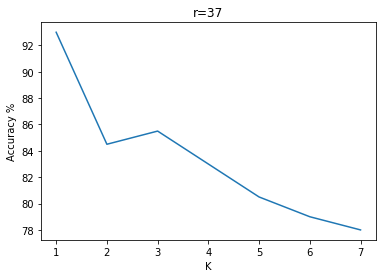

-----------------------------------
Accuracy for r=53 k=1: 94.0 %
Accuracy for r=53 k=2: 85.5 %
Accuracy for r=53 k=3: 85.5 %
Accuracy for r=53 k=4: 84.5 %
Accuracy for r=53 k=5: 83.0 %
Accuracy for r=53 k=6: 78.0 %
Accuracy for r=53 k=7: 77.5 %
-----------------------------------


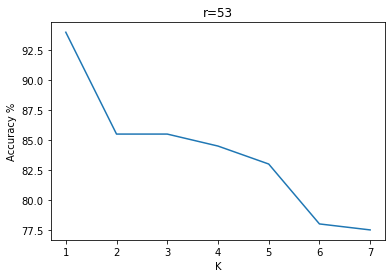

-----------------------------------
Accuracy for r=77 k=1: 94.5 %
Accuracy for r=77 k=2: 85.0 %
Accuracy for r=77 k=3: 85.0 %
Accuracy for r=77 k=4: 85.0 %
Accuracy for r=77 k=5: 81.5 %
Accuracy for r=77 k=6: 76.5 %
Accuracy for r=77 k=7: 75.5 %
-----------------------------------


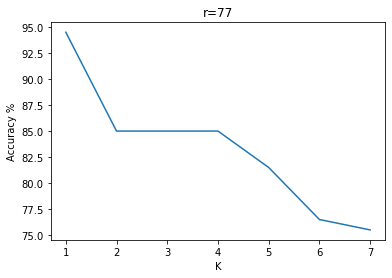

-----------------------------------
Accuracy for r=116 k=1: 93.5 %
Accuracy for r=116 k=2: 84.5 %
Accuracy for r=116 k=3: 84.5 %
Accuracy for r=116 k=4: 83.0 %
Accuracy for r=116 k=5: 81.5 %
Accuracy for r=116 k=6: 77.0 %
Accuracy for r=116 k=7: 74.0 %
-----------------------------------


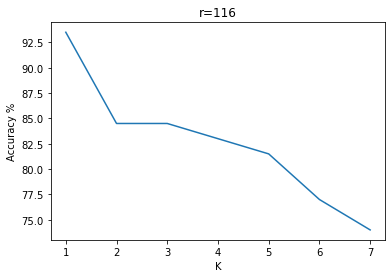

-----------------------------------


In [ ]:
Ks= [1,2,3,4,5,6,7]
for i in range(len(R)):
  Proj=EigenVectors[:R[i]]
  Reduced_Data_Train = np.dot(Data_Train,Proj.T)
  Reduced_Data_Test = np.dot(Data_Test,Proj.T)

  r_accuracies=[]
  for k in Ks:
    accuracy=knn(Reduced_Data_Train,Reduced_Data_Test,Y_Train,Y_Test,k)
    r_accuracies.append(accuracy)
    print(f'Accuracy for r={R[i]} k={k}: {accuracy} %')
  print('-----------------------------------')
  plt.title(f'r={R[i]}')
  plt.xlabel('K')
  plt.ylabel('Accuracy %')
  plt.plot(Ks,r_accuracies)
  plt.show()
  print('-----------------------------------')

The code above applies the pseudocode provided for the PCA algorithm and
finds r for each value of alpha (0.8, 0.85, 0.9, 0.95), gets the projection 
matrix and then gets the reduced dimensions data of r dimensions. The 
training data was used to get the projection matrix which was later used to 
reduce the dimensions of both training andtestingdata. We applied the K-NN
as a classifier for the images using k=1,3,5,7. We can notice that k=1 works 
best for this data. A plot of the accuracy against the k values for each value 
of r was provided to further support our claims

# **LDA**

In [ ]:
nk = 5
dataK = []
if Bonus:
    for i in range(0,280,7):
        dataK.append(Data_Train[i:i+7])
else:    
    for i in range(0,200,5):
        dataK.append(Data_Train[i:i+5])
meanK = []
for i in range(40):
  meanK.append(np.mean(dataK[i],axis=0))
Sb = np.zeros((10304,10304))
for i in range(40):
  Sk = meanK[i] - Mean
  Sb += (nk*(np.dot(Sk,Sk.T)))


In [ ]:
S = np.zeros((10304,10304))
for i in range(40):
  Z = dataK[i] - meanK[i]
  Sk = np.dot(Z.T,Z)
  S+= Sk

In [ ]:
Lda_EigenValues , Lda_EigenVectors = lin.eigh(np.dot(lin.inv(S),Sb))

The code above applies the pseudocode provided for the LDA algorithm and
gets the reduced dimensionality data of 39 dimensions, then projects the 
train and test data and finally applies K-NN as a classifier.

10304
40
Accuracy for k=1: 94.5 %
Accuracy for k=2: 86.5 %
Accuracy for k=3: 85.5 %
Accuracy for k=4: 84.5 %
Accuracy for k=5: 78.0 %
Accuracy for k=6: 76.0 %
Accuracy for k=7: 73.5 %


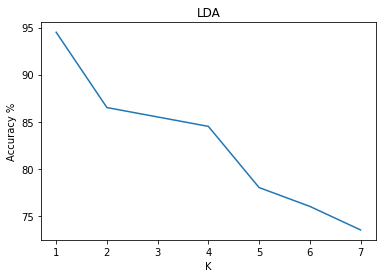

In [ ]:
Lda_EigenVectors_2 = Lda_EigenVectors.T[::-1]
print(len(Lda_EigenVectors_2))
Lda_EigenVectors_3 = Lda_EigenVectors_2[:40]
print(len(Lda_EigenVectors_3))

D_train_LDA_reduced=np.dot(Data_Train,Lda_EigenVectors_3.T)
D_test_LDA_reduced=np.dot(Data_Test,Lda_EigenVectors_3.T)
LDA_accuracies=[]
for k in Ks:
    accuracy=knn(D_train_LDA_reduced,D_test_LDA_reduced,Y_Train,Y_Test,k)
    LDA_accuracies.append(accuracy)
    print(f'Accuracy for k={k}: {accuracy} %')
plt.title(f'LDA')
plt.xlabel('K')
plt.ylabel('Accuracy %')
plt.plot(Ks,LDA_accuracies)
plt.show()

# **Conclousin**

We can notice that interestingly in our case PCA performs better than LDA, 
and that the 70-30 (96.67% PCA, 91.67% LDA) split performs better than 
the 50-50 split (94.5% PCA, 94.5% LDA) in case of PCA but worse in case of 
LDA.